In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!cp "/content/drive/MyDrive/TwiBot-20/Twibot-20.zip" "data.zip"
!unzip data.zip

Archive:  data.zip
   creating: Twibot-20/
  inflating: Twibot-20/dev.json      
  inflating: Twibot-20/LICENSE       
  inflating: Twibot-20/README.txt    
  inflating: Twibot-20/support.json  
  inflating: Twibot-20/test.json     
  inflating: Twibot-20/train.json    
  inflating: Twibot-20/TwiBot-20 Seed Users.txt  


In [3]:
import pandas as pd
import numpy as np
import random

In [4]:
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [5]:
train = pd.read_json('/content/Twibot-20/train.json')
test = pd.read_json('/content/Twibot-20/test.json')
#support = pd.read_json('/content/Twibot-20/support.json')
#dev = pd.read_json('/content/Twibot-20/dev.json')

In [6]:
dev = pd.read_json('/content/Twibot-20/dev.json')

In [7]:
train

,ID,profile,tweet,neighbor,domain,label
0,17461978,"{'id': '17461978 ', 'id_str': '17461978 ', 'na...",[RT @CarnivalCruise: 🎉 Are you ready to see wh...,None,"[Politics, Business, Entertainment]",0
1,1297437077403885568,"{'id': '1297437077403885568 ', 'id_str': '1297...",None,"{'following': ['170861207', '23970102', '47293...",[Politics],1
2,17685258,"{'id': '17685258 ', 'id_str': '17685258 ', 'na...",[RT @realDonaldTrump: THANK YOU #RNC2020! http...,"{'following': ['46464108', '21536398', '186434...","[Politics, Entertainment, Sports]",0
3,15750898,"{'id': '15750898 ', 'id_str': '15750898 ', 'na...",[A family fears they may have been cheated out...,"{'following': ['2324715174', '24030137', '2336...",[Politics],0
4,1659167666,"{'id': '1659167666 ', 'id_str': '1659167666 ',...",[RT @VonteThePlug: Yeah but he ain’t got one h...,"{'following': ['1628313708', '726405625', '130...",[Politics],1
...,...,...,...,...,...,...
8273,1630890068,"{'id': '1630890068 ', 'id_str': '1630890068 ',...",[@sethgoldberg17 @jaysonst Fan interference? I...,"{'following': ['237453978', '462581299', '1706...",[Sports],0
8274,713519580757536768,"{'id': '713519580757536769 ', 'id_str': '71351...",[@C130Matt I think I heard a voice from out in...,"{'following': ['36991422', '32567081', '133983...",[Sports],1
8275,93345260,"{'id': '93345260 ', 'id_str': '93345260 ', 'na...",[@savage_esquire That's unfuckingbelievable.\n...,"{'following': ['714636670268792832', '23341114...",[Sports],1
8276,1749309397,"{'id': '1749309397 ', 'id_str': '1749309397 ',...",[@Jomboy_ Doesn’t want to pull anymore Hammys\...,"{'following': ['3124065581', '413364940', '211...",[Sports],1


In [8]:
test

,ID,profile,tweet,neighbor,domain,label
0,1188812492010487808,"{'id': '1188812492010487808 ', 'id_str': '1188...",[RT @clevelanddotcom: Three Ohio House Republi...,None,"[Politics, Sports]",1
1,155659213,"{'id': '155659213 ', 'id_str': '155659213 ', '...","[We touch our hair 96 times a day on average, ...",None,"[Politics, Business, Entertainment, Sports]",0
2,147725246,"{'id': '147725246 ', 'id_str': '147725246 ', '...",['He Looked Like He Knew What He Was Doing': C...,"{'following': ['36734275', '20713061', '755419...",[Politics],0
3,1296248637194895360,"{'id': '1296248637194895360 ', 'id_str': '1296...","[Estamos abiertos a colaboraciones, por lo cuá...","{'following': ['87818409', '41390292', '140910...",[Politics],1
4,1339835893,"{'id': '1339835893 ', 'id_str': '1339835893 ',...",[The suffragists chose purple and gold to repr...,None,"[Politics, Business, Entertainment, Sports]",0
...,...,...,...,...,...,...
1178,452754350,"{'id': '452754350 ', 'id_str': '452754350 ', '...",[Chicago Cubs sign [former Texas Tech] relieve...,"{'following': ['2924422992', '2365623499', '33...",[Sports],1
1179,850435801687183360,"{'id': '850435801687183362 ', 'id_str': '85043...",[RT @TheWoodofHolly: @CardsFromAttic GMA is su...,"{'following': ['704144006129692674', '95336330...",[Sports],1
1180,2188795745,"{'id': '2188795745 ', 'id_str': '2188795745 ',...",[RT @OriginalFunko: RT &amp; follow @OriginalF...,"{'following': ['66762778', '2981733093', '1861...",[Sports],1
1181,940687680,"{'id': '940687680 ', 'id_str': '940687680 ', '...",[RT @pierre_rochard: Run the numbers.\n\nBuy B...,"{'following': ['559791853', '10080654991362498...",[Sports],1


In [9]:
training = train[['profile', 'tweet', 'label']]
testing = test[['profile', 'tweet', 'label']]

In [10]:
training

,profile,tweet,label
0,"{'id': '17461978 ', 'id_str': '17461978 ', 'na...",[RT @CarnivalCruise: 🎉 Are you ready to see wh...,0
1,"{'id': '1297437077403885568 ', 'id_str': '1297...",None,1
2,"{'id': '17685258 ', 'id_str': '17685258 ', 'na...",[RT @realDonaldTrump: THANK YOU #RNC2020! http...,0
3,"{'id': '15750898 ', 'id_str': '15750898 ', 'na...",[A family fears they may have been cheated out...,0
4,"{'id': '1659167666 ', 'id_str': '1659167666 ',...",[RT @VonteThePlug: Yeah but he ain’t got one h...,1
...,...,...,...
8273,"{'id': '1630890068 ', 'id_str': '1630890068 ',...",[@sethgoldberg17 @jaysonst Fan interference? I...,0
8274,"{'id': '713519580757536769 ', 'id_str': '71351...",[@C130Matt I think I heard a voice from out in...,1
8275,"{'id': '93345260 ', 'id_str': '93345260 ', 'na...",[@savage_esquire That's unfuckingbelievable.\n...,1
8276,"{'id': '1749309397 ', 'id_str': '1749309397 ',...",[@Jomboy_ Doesn’t want to pull anymore Hammys\...,1


In [11]:
testing

,profile,tweet,label
0,"{'id': '1188812492010487808 ', 'id_str': '1188...",[RT @clevelanddotcom: Three Ohio House Republi...,1
1,"{'id': '155659213 ', 'id_str': '155659213 ', '...","[We touch our hair 96 times a day on average, ...",0
2,"{'id': '147725246 ', 'id_str': '147725246 ', '...",['He Looked Like He Knew What He Was Doing': C...,0
3,"{'id': '1296248637194895360 ', 'id_str': '1296...","[Estamos abiertos a colaboraciones, por lo cuá...",1
4,"{'id': '1339835893 ', 'id_str': '1339835893 ',...",[The suffragists chose purple and gold to repr...,0
...,...,...,...
1178,"{'id': '452754350 ', 'id_str': '452754350 ', '...",[Chicago Cubs sign [former Texas Tech] relieve...,1
1179,"{'id': '850435801687183362 ', 'id_str': '85043...",[RT @TheWoodofHolly: @CardsFromAttic GMA is su...,1
1180,"{'id': '2188795745 ', 'id_str': '2188795745 ',...",[RT @OriginalFunko: RT &amp; follow @OriginalF...,1
1181,"{'id': '940687680 ', 'id_str': '940687680 ', '...",[RT @pierre_rochard: Run the numbers.\n\nBuy B...,1


In [12]:
training_0 = training.dropna(axis = 0)
testing_0 = testing.dropna(axis = 0)

In [13]:
training_0.reset_index(drop=True, inplace=True)

In [14]:
testing_0.reset_index(drop=True, inplace=True)

In [25]:
train_tweet = training_0[['tweet', 'label']]
test_tweet = testing_0[['tweet', 'label']]

In [26]:
train_tweet

,tweet,label
0,[RT @CarnivalCruise: 🎉 Are you ready to see wh...,0
1,[RT @realDonaldTrump: THANK YOU #RNC2020! http...,0
2,[A family fears they may have been cheated out...,0
3,[RT @VonteThePlug: Yeah but he ain’t got one h...,1
4,"[RT @elonmusk: Aloha, welcome back from space ...",0
...,...,...
8218,[@sethgoldberg17 @jaysonst Fan interference? I...,0
8219,[@C130Matt I think I heard a voice from out in...,1
8220,[@savage_esquire That's unfuckingbelievable.\n...,1
8221,[@Jomboy_ Doesn’t want to pull anymore Hammys\...,1


In [27]:
train_tweet.loc[:, 'No_of_tweets'] = 0
for i in range(len(train_tweet['tweet'])):
  l = len(train_tweet['tweet'][i])
  train_tweet.loc[i, 'No_of_tweets'] = l

In [28]:
bots_train = train_tweet[train_tweet['label'] == 1].reset_index(drop = True)
genuine_train = train_tweet[train_tweet['label'] != 1].reset_index(drop = True)

In [29]:
bots_train

,tweet,label,No_of_tweets
0,[RT @VonteThePlug: Yeah but he ain’t got one h...,1,88
1,[https://t.co/KWnKV9F0fw\n],1,1
2,[RT @toadmeister: If the BBC is investing £100...,1,200
3,"[@BrightskinMacky 😂😂😂\n, Bone what??? 😂😂😂 RT @...",1,200
4,"[Milano pigliatutto. Dopo l’ex Banco Popolare,...",1,200
...,...,...,...
4626,[Love &amp; Entrepreneurship: Relationship The...,1,200
4627,[@C130Matt I think I heard a voice from out in...,1,200
4628,[@savage_esquire That's unfuckingbelievable.\n...,1,200
4629,[@Jomboy_ Doesn’t want to pull anymore Hammys\...,1,200


In [30]:
genuine_train

,tweet,label,No_of_tweets
0,[RT @CarnivalCruise: 🎉 Are you ready to see wh...,0,200
1,[RT @realDonaldTrump: THANK YOU #RNC2020! http...,0,200
2,[A family fears they may have been cheated out...,0,200
3,"[RT @elonmusk: Aloha, welcome back from space ...",0,200
4,[So amazing to see what @yael and @CitizenApp ...,0,200
...,...,...,...
3587,"[@JOHNSHIP99 @gunsnroses @Aerosmith It was.\n,...",0,200
3588,[I agree. Go home at sundown. No more rioting ...,0,200
3589,[@tomilahren imagine if Humayun Khan died in B...,0,196
3590,"[This #LaborDayWeekend, binge-watch the East S...",0,200


In [31]:
bots_train = bots_train[bots_train['No_of_tweets'] == 200].reset_index(drop = True)
genuine_train = genuine_train[genuine_train['No_of_tweets'] == 200].reset_index(drop = True)

In [32]:
bots_train

,tweet,label,No_of_tweets
0,[RT @toadmeister: If the BBC is investing £100...,1,200
1,"[@BrightskinMacky 😂😂😂\n, Bone what??? 😂😂😂 RT @...",1,200
2,"[Milano pigliatutto. Dopo l’ex Banco Popolare,...",1,200
3,[The only enforcement for this is the American...,1,200
4,[I'm fighting the Drug Companys &amp; drug pri...,1,200
...,...,...,...
2116,[Love &amp; Entrepreneurship: Relationship The...,1,200
2117,[@C130Matt I think I heard a voice from out in...,1,200
2118,[@savage_esquire That's unfuckingbelievable.\n...,1,200
2119,[@Jomboy_ Doesn’t want to pull anymore Hammys\...,1,200


In [33]:
genuine_train

,tweet,label,No_of_tweets
0,[RT @CarnivalCruise: 🎉 Are you ready to see wh...,0,200
1,[RT @realDonaldTrump: THANK YOU #RNC2020! http...,0,200
2,[A family fears they may have been cheated out...,0,200
3,"[RT @elonmusk: Aloha, welcome back from space ...",0,200
4,[So amazing to see what @yael and @CitizenApp ...,0,200
...,...,...,...
2334,[RT @Pervaizistan: According to Cohen after Ob...,0,200
2335,"[@JOHNSHIP99 @gunsnroses @Aerosmith It was.\n,...",0,200
2336,[I agree. Go home at sundown. No more rioting ...,0,200
2337,"[This #LaborDayWeekend, binge-watch the East S...",0,200


In [34]:
No_of_users = 100

In [35]:
bots_train_sampled = bots_train.sample(No_of_users).reset_index(drop = True)
genuine_train_sampled = genuine_train.sample(No_of_users).reset_index(drop = True)

In [36]:
bots_train_sampled

,tweet,label,No_of_tweets
0,[@aGingerGrant @MrAndyNgo @PortlandPolice 11\n...,1,200
1,[https://t.co/A0sCjYIyLP\nPBM Cryogenic Ball V...,1,200
2,[@BBCVishalaSP This is an impressive goal! 👏\n...,1,200
3,[RT @risingodegua: 🥳🥳🥳 We are trending on GitH...,1,200
4,[RT @Tierney_Megan: In a court declaration fil...,1,200
...,...,...,...
95,[This #EmergingTech is enabling kids to learn ...,1,200
96,"[Love to see it https://t.co/ooMqRS67DE\n, Wel...",1,200
97,"[@FaerynLovely Hiiiii\n, #RahatIndori #RIPRaha...",1,200
98,[RT @abcnews: Street artist Banksy buys yacht ...,1,200


In [37]:
genuine_train_sampled

,tweet,label,No_of_tweets
0,[Shell-Shocked Chicken Wing Lone Survivor From...,0,200
1,[#WFH like a boss—@scoutthecity’s Sai De Silva...,0,200
2,"[It can’t be nobody if it’s not me\n, A nude a...",0,200
3,"[@Ben_Baby Practically speaking, there would b...",0,200
4,[Happy 30th Bday gift right there @sdotcurry!!...,0,200
...,...,...,...
95,[@goyal_it_is It’s there on my FB show today ...,0,200
96,[Acredite você ou não hoje é dia de jogo! Vamo...,0,200
97,[@_carrot1979 @DarrenT87369147 @MindCharity @M...,0,200
98,[No entiendo el equipo pero hay que ganar mier...,0,200


In [38]:
bots_train_sampled = bots_train_sampled[['tweet']]
genuine_train_sampled = genuine_train_sampled[['tweet']]

In [39]:
bots_train_sampled

,tweet
0,[@aGingerGrant @MrAndyNgo @PortlandPolice 11\n...
1,[https://t.co/A0sCjYIyLP\nPBM Cryogenic Ball V...
2,[@BBCVishalaSP This is an impressive goal! 👏\n...
3,[RT @risingodegua: 🥳🥳🥳 We are trending on GitH...
4,[RT @Tierney_Megan: In a court declaration fil...
...,...
95,[This #EmergingTech is enabling kids to learn ...
96,"[Love to see it https://t.co/ooMqRS67DE\n, Wel..."
97,"[@FaerynLovely Hiiiii\n, #RahatIndori #RIPRaha..."
98,[RT @abcnews: Street artist Banksy buys yacht ...


In [40]:
bots_train_n_sampled = pd.DataFrame()
k = 0
for i in range(len(bots_train_sampled['tweet'])):
  lis = bots_train_sampled['tweet'][i]
  for j in range(len(lis)):
    text = lis[j]
    bots_train_n_sampled.loc[k, 'tweet'] = text
    #bots_train_n_sampled.loc[k, 'label'] = 0
    k += 1

In [41]:
bots_train_n_sampled

,tweet
0,@aGingerGrant @MrAndyNgo @PortlandPolice 11\n
1,RT @PortlandPolice: Press Release: Detectives ...
2,RT @MrAndyNgo: UPDATE:\n
3,@stranahan Hahaha\n
4,RT @ViewFrom14thFlr: @NHFTHR https://t.co/mDdK...
...,...
19995,@taradublinrocks @GOP Truth https://t.co/rNif3...
19996,RT @SarahLongwell25: Obviously Joe Biden is no...
19997,Geoff Bennett with the receipts that DeJoy was...
19998,CORE table read of “Fast Times at Ridgemont Hi...


In [42]:
genuine_train_n_sampled = pd.DataFrame()
k = 0
for i in range(len(genuine_train_sampled['tweet'])):
  lis = genuine_train_sampled['tweet'][i]
  for j in range(len(lis)):
    text = lis[j]
    genuine_train_n_sampled.loc[k, 'tweet'] = text
    #genuine_train_n_sampled.loc[k, 'label'] = 0
    k += 1

In [43]:
genuine_train_n_sampled

,tweet
0,Shell-Shocked Chicken Wing Lone Survivor From ...
1,Girl Scouts Introduce New Cookie https://t.co/...
2,Melania Spanks 10-Year-Old Bully With Paddle D...
3,"‘Oh Jeez, Oh Jeez, Oh Jeez,’ Says Eric Trump A..."
4,"To see more unmatched reporting, visit https:/..."
...,...
19995,@jguaido Tu con tus malditos Chismes estas es ...
19996,Supervision maldito gobierno hasta cuando cree...
19997,@FaniaRodrigues @SergioNovelli Jajaj este malv...
19998,D donde sale será q ellos pagan los salarios e...


In [44]:
genuine_train_n_sampled['tweet'] = genuine_train_n_sampled.tweet.str.lower()

In [45]:
genuine_train_n_sampled

,tweet
0,shell-shocked chicken wing lone survivor from ...
1,girl scouts introduce new cookie https://t.co/...
2,melania spanks 10-year-old bully with paddle d...
3,"‘oh jeez, oh jeez, oh jeez,’ says eric trump a..."
4,"to see more unmatched reporting, visit https:/..."
...,...
19995,@jguaido tu con tus malditos chismes estas es ...
19996,supervision maldito gobierno hasta cuando cree...
19997,@faniarodrigues @sergionovelli jajaj este malv...
19998,d donde sale será q ellos pagan los salarios e...


In [46]:
bots_train_n_sampled['tweet'] = bots_train_n_sampled.tweet.str.lower()

In [47]:
bots_train_n_sampled

,tweet
0,@agingergrant @mrandyngo @portlandpolice 11\n
1,rt @portlandpolice: press release: detectives ...
2,rt @mrandyngo: update:\n
3,@stranahan hahaha\n
4,rt @viewfrom14thflr: @nhfthr https://t.co/mddk...
...,...
19995,@taradublinrocks @gop truth https://t.co/rnif3...
19996,rt @sarahlongwell25: obviously joe biden is no...
19997,geoff bennett with the receipts that dejoy was...
19998,core table read of “fast times at ridgemont hi...


In [48]:
re.sub(r'[^A-Za-z]+', ' ', 'rt @lrpow79: thank god they found @somehow #user')

'rt lrpow thank god they found somehow user'

In [49]:
# Define a function to clean the text
def clean(text):
    # Removes URL
    text = re.sub(r'https?:\/\/\S+', ' ', text)
    text = re.sub(r"www\.[a-z]?\.?(com)+|[a-z]+\.(com)",' ',text)

    #Removes RT
    text = re.sub(r'^rt[\s]+', '', text)
    #Removes mentions, unwanted characters,numbers,punctuations
    text = re.sub(r'@[\w]+', '', text)
    text = re.sub(r'[^A-Za-z]+', ' ', text)
    
    return text

# Cleaning the text in the review column
bots_train_n_sampled['Cleaned Tweets'] = bots_train_n_sampled['tweet'].apply(clean)
bots_train_n_sampled.head()

,tweet,Cleaned Tweets
0,@agingergrant @mrandyngo @portlandpolice 11\n,
1,rt @portlandpolice: press release: detectives ...,press release detectives located unidentified...
2,rt @mrandyngo: update:\n,update
3,@stranahan hahaha\n,hahaha
4,rt @viewfrom14thflr: @nhfthr https://t.co/mddk...,


In [50]:
# Cleaning the text in the review column
genuine_train_n_sampled['Cleaned Tweets'] = genuine_train_n_sampled['tweet'].apply(clean)
genuine_train_n_sampled.head()

,tweet,Cleaned Tweets
0,shell-shocked chicken wing lone survivor from ...,shell shocked chicken wing lone survivor from ...
1,girl scouts introduce new cookie https://t.co/...,girl scouts introduce new cookie whatdoyouthink
2,melania spanks 10-year-old bully with paddle d...,melania spanks year old bully with paddle duri...
3,"‘oh jeez, oh jeez, oh jeez,’ says eric trump a...",oh jeez oh jeez oh jeez says eric trump after...
4,"to see more unmatched reporting, visit https:/...",to see more unmatched reporting visit


In [51]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [52]:

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}

def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

bots_train_n_sampled['POS tagged'] = bots_train_n_sampled['Cleaned Tweets'].apply(token_stop_pos)
bots_train_n_sampled.head()

,tweet,Cleaned Tweets,POS tagged
0,@agingergrant @mrandyngo @portlandpolice 11\n,,[]
1,rt @portlandpolice: press release: detectives ...,press release detectives located unidentified...,"[(press, n), (release, n), (detectives, n), (l..."
2,rt @mrandyngo: update:\n,update,"[(update, n)]"
3,@stranahan hahaha\n,hahaha,"[(hahaha, n)]"
4,rt @viewfrom14thflr: @nhfthr https://t.co/mddk...,,[]


In [53]:
genuine_train_n_sampled['POS tagged'] = genuine_train_n_sampled['Cleaned Tweets'].apply(token_stop_pos)
genuine_train_n_sampled.head()

,tweet,Cleaned Tweets,POS tagged
0,shell-shocked chicken wing lone survivor from ...,shell shocked chicken wing lone survivor from ...,"[(shell, n), (shocked, v), (chicken, a), (wing..."
1,girl scouts introduce new cookie https://t.co/...,girl scouts introduce new cookie whatdoyouthink,"[(girl, n), (scouts, n), (introduce, v), (new,..."
2,melania spanks 10-year-old bully with paddle d...,melania spanks year old bully with paddle duri...,"[(melania, n), (spanks, n), (year, n), (old, a..."
3,"‘oh jeez, oh jeez, oh jeez,’ says eric trump a...",oh jeez oh jeez oh jeez says eric trump after...,"[(oh, None), (jeez, n), (oh, a), (jeez, n), (o..."
4,"to see more unmatched reporting, visit https:/...",to see more unmatched reporting visit,"[(see, v), (unmatched, a), (reporting, n), (vi..."


In [54]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos: 
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:  
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew
    
bots_train_n_sampled['Lemma'] = bots_train_n_sampled['POS tagged'].apply(lemmatize)
bots_train_n_sampled.head()

,tweet,Cleaned Tweets,POS tagged,Lemma
0,@agingergrant @mrandyngo @portlandpolice 11\n,,[],
1,rt @portlandpolice: press release: detectives ...,press release detectives located unidentified...,"[(press, n), (release, n), (detectives, n), (l...",press release detective locate unidentified ...
2,rt @mrandyngo: update:\n,update,"[(update, n)]",update
3,@stranahan hahaha\n,hahaha,"[(hahaha, n)]",hahaha
4,rt @viewfrom14thflr: @nhfthr https://t.co/mddk...,,[],


In [55]:
genuine_train_n_sampled['Lemma'] = genuine_train_n_sampled['POS tagged'].apply(lemmatize)
genuine_train_n_sampled.head()

,tweet,Cleaned Tweets,POS tagged,Lemma
0,shell-shocked chicken wing lone survivor from ...,shell shocked chicken wing lone survivor from ...,"[(shell, n), (shocked, v), (chicken, a), (wing...",shell shock chicken wing lone survivor unit
1,girl scouts introduce new cookie https://t.co/...,girl scouts introduce new cookie whatdoyouthink,"[(girl, n), (scouts, n), (introduce, v), (new,...",girl scout introduce new cookie whatdoyouthink
2,melania spanks 10-year-old bully with paddle d...,melania spanks year old bully with paddle duri...,"[(melania, n), (spanks, n), (year, n), (old, a...",melania spank year old bully paddle rnc spee...
3,"‘oh jeez, oh jeez, oh jeez,’ says eric trump a...",oh jeez oh jeez oh jeez says eric trump after...,"[(oh, None), (jeez, n), (oh, a), (jeez, n), (o...",oh jeez oh jeez oh jeez say eric trump accid...
4,"to see more unmatched reporting, visit https:/...",to see more unmatched reporting visit,"[(see, v), (unmatched, a), (reporting, n), (vi...",see unmatched reporting visit


In [56]:
bots_train_n_sampled[['tweet', 'Lemma']]

,tweet,Lemma
0,@agingergrant @mrandyngo @portlandpolice 11\n,
1,rt @portlandpolice: press release: detectives ...,press release detective locate unidentified ...
2,rt @mrandyngo: update:\n,update
3,@stranahan hahaha\n,hahaha
4,rt @viewfrom14thflr: @nhfthr https://t.co/mddk...,
...,...,...
19995,@taradublinrocks @gop truth https://t.co/rnif3...,truth
19996,rt @sarahlongwell25: obviously joe biden is no...,obviously joe biden political conservative y...
19997,geoff bennett with the receipts that dejoy was...,geoff bennett receipt dejoy lie lock
19998,core table read of “fast times at ridgemont hi...,core table read fast time ridgemont high pos...


In [57]:
from textblob import TextBlob

# function to calculate subjectivity 
def getSubjectivity(review):
    return TextBlob(review).sentiment.subjectivity

# function to calculate polarity
def getPolarity(review):
    return TextBlob(review).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [58]:
fin_data_bots = pd.DataFrame(bots_train_n_sampled[['tweet', 'Lemma']])

In [59]:
fin_data_genuine = pd.DataFrame(genuine_train_n_sampled[['tweet', 'Lemma']])

In [60]:
# fin_data['Subjectivity'] = fin_data['Lemma'].apply(getSubjectivity) 
fin_data_bots['Polarity'] = fin_data_bots['Lemma'].apply(getPolarity) 
fin_data_bots['Analysis'] = fin_data_bots['Polarity'].apply(analysis)
fin_data_bots.head()

,tweet,Lemma,Polarity,Analysis
0,@agingergrant @mrandyngo @portlandpolice 11\n,,0.0,Neutral
1,rt @portlandpolice: press release: detectives ...,press release detective locate unidentified ...,0.0,Neutral
2,rt @mrandyngo: update:\n,update,0.0,Neutral
3,@stranahan hahaha\n,hahaha,0.2,Positive
4,rt @viewfrom14thflr: @nhfthr https://t.co/mddk...,,0.0,Neutral


In [61]:
# fin_data['Subjectivity'] = fin_data['Lemma'].apply(getSubjectivity) 
fin_data_genuine['Polarity'] = fin_data_genuine['Lemma'].apply(getPolarity) 
fin_data_genuine['Analysis'] = fin_data_genuine['Polarity'].apply(analysis)
fin_data_genuine.head()

,tweet,Lemma,Polarity,Analysis
0,shell-shocked chicken wing lone survivor from ...,shell shock chicken wing lone survivor unit,-0.600000,Negative
1,girl scouts introduce new cookie https://t.co/...,girl scout introduce new cookie whatdoyouthink,0.136364,Positive
2,melania spanks 10-year-old bully with paddle d...,melania spank year old bully paddle rnc spee...,0.550000,Positive
3,"‘oh jeez, oh jeez, oh jeez,’ says eric trump a...",oh jeez oh jeez oh jeez say eric trump accid...,0.212500,Positive
4,"to see more unmatched reporting, visit https:/...",see unmatched reporting visit,0.000000,Neutral


In [62]:
fin_data_genuine.loc[4, 'tweet']

'to see more unmatched reporting, visit https://t.co/csf5qubhed. https://t.co/s5ow08ixgh\n'

In [63]:
tb_counts_bots = fin_data_bots.Analysis.value_counts()
tb_counts_bots

Neutral     9497
Positive    7487
Negative    3016
Name: Analysis, dtype: int64

In [64]:
tb_counts_genuine = fin_data_genuine.Analysis.value_counts()
tb_counts_genuine

Neutral     9867
Positive    7771
Negative    2362
Name: Analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x7f3193d3bc90>,
 [Text(0.08682176416107622, 1.0965682747863714, 'Neutral'),
  Text(-0.5775450173332056, -0.936184678871422, 'Positive'),
  Text(1.201314705606589, -0.6159082546072543, 'Negative')],
 [Text(0.047357325906041574, 0.5981281498834752, '47.5%'),
  Text(-0.3150245549090212, -0.5106461884753211, '37.4%'),
  Text(0.7563833331597042, -0.3877940862341971, '15.1%')])

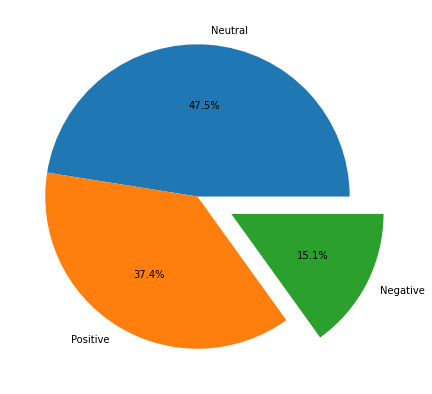

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline

tb_count= fin_data_bots.Analysis.value_counts()
plt.figure(figsize=(10, 7))
plt.pie(tb_counts_bots.values, labels = tb_counts_bots.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
# plt.legend()

([<matplotlib.patches.Wedge at 0x7f3193d1fa10>,
 [Text(0.0229790814072513, 1.0997599564530793, 'Neutral'),
  Text(-0.42015343392386123, -1.0165978024577802, 'Positive'),
  Text(1.258142335430928, -0.48946691797956104, 'Negative')],
 [Text(0.012534044403955254, 0.599869067156225, '49.3%'),
  Text(-0.22917460032210607, -0.5545078922496982, '38.9%'),
  Text(0.7921636926787323, -0.3081828742834273, '11.8%')])

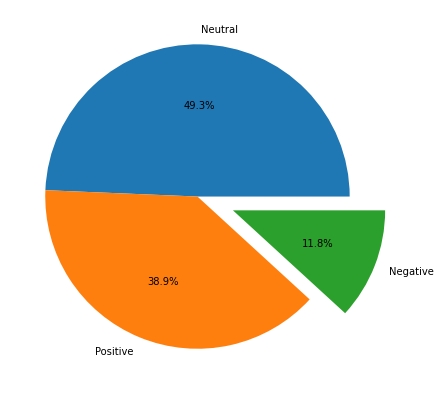

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline

tb_count= fin_data_genuine.Analysis.value_counts()
plt.figure(figsize=(10, 7))
plt.pie(tb_counts_genuine.values, labels = tb_counts_genuine.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
# plt.legend()

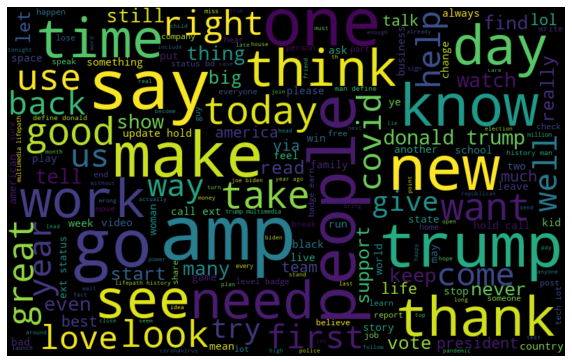

In [67]:
all_words = ' '.join([text for text in fin_data_bots['Lemma']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


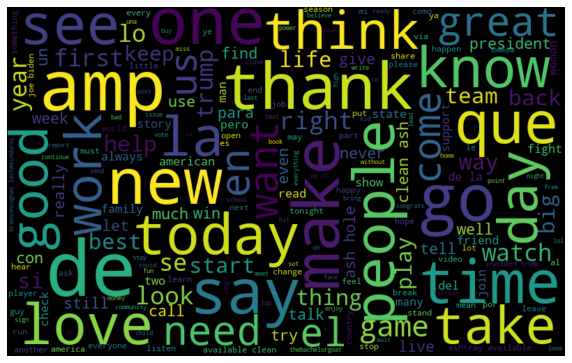

In [68]:
all_words = ' '.join([text for text in fin_data_genuine['Lemma']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

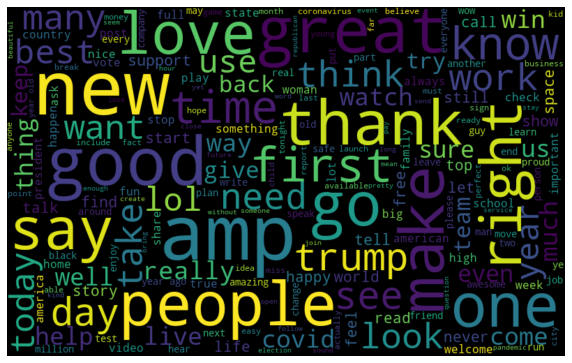

In [69]:
normal_words =' '.join([text for text in fin_data_bots['Lemma'][fin_data_bots['Analysis'] == 'Positive']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

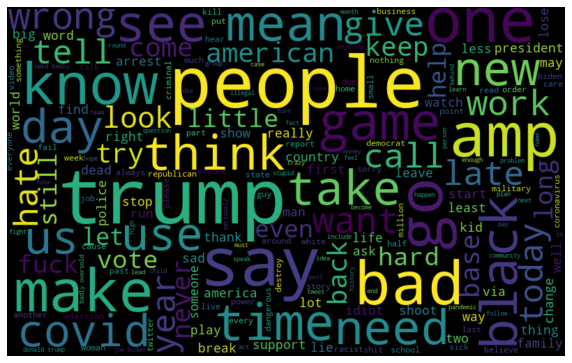

In [70]:
normal_words =' '.join([text for text in fin_data_bots['Lemma'][fin_data_bots['Analysis'] == 'Negative']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

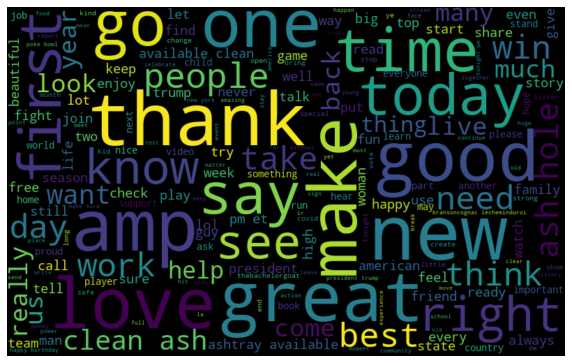

In [71]:
normal_words =' '.join([text for text in fin_data_genuine['Lemma'][fin_data_genuine['Analysis'] == 'Positive']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

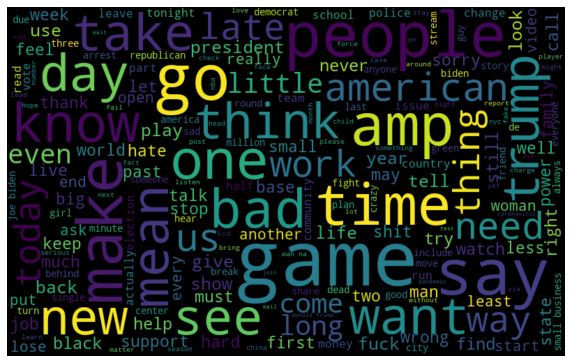

In [72]:
normal_words =' '.join([text for text in fin_data_genuine['Lemma'][fin_data_genuine['Analysis'] == 'Negative']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

**Sentiment Analysis on Whole Dataset**

In [73]:
training = train[['profile', 'tweet', 'domain', 'label']]
testing = test[['profile', 'tweet', 'domain', 'label']]

In [74]:
training

,profile,tweet,domain,label
0,"{'id': '17461978 ', 'id_str': '17461978 ', 'na...",[RT @CarnivalCruise: 🎉 Are you ready to see wh...,"[Politics, Business, Entertainment]",0
1,"{'id': '1297437077403885568 ', 'id_str': '1297...",None,[Politics],1
2,"{'id': '17685258 ', 'id_str': '17685258 ', 'na...",[RT @realDonaldTrump: THANK YOU #RNC2020! http...,"[Politics, Entertainment, Sports]",0
3,"{'id': '15750898 ', 'id_str': '15750898 ', 'na...",[A family fears they may have been cheated out...,[Politics],0
4,"{'id': '1659167666 ', 'id_str': '1659167666 ',...",[RT @VonteThePlug: Yeah but he ain’t got one h...,[Politics],1
...,...,...,...,...
8273,"{'id': '1630890068 ', 'id_str': '1630890068 ',...",[@sethgoldberg17 @jaysonst Fan interference? I...,[Sports],0
8274,"{'id': '713519580757536769 ', 'id_str': '71351...",[@C130Matt I think I heard a voice from out in...,[Sports],1
8275,"{'id': '93345260 ', 'id_str': '93345260 ', 'na...",[@savage_esquire That's unfuckingbelievable.\n...,[Sports],1
8276,"{'id': '1749309397 ', 'id_str': '1749309397 ',...",[@Jomboy_ Doesn’t want to pull anymore Hammys\...,[Sports],1


In [75]:
training.dropna(axis = 0, inplace = True)
testing.dropna(axis = 0, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [76]:
training.reset_index(drop = True, inplace = True)
testing.reset_index(drop = True, inplace = True)

In [77]:
training

,profile,tweet,domain,label
0,"{'id': '17461978 ', 'id_str': '17461978 ', 'na...",[RT @CarnivalCruise: 🎉 Are you ready to see wh...,"[Politics, Business, Entertainment]",0
1,"{'id': '17685258 ', 'id_str': '17685258 ', 'na...",[RT @realDonaldTrump: THANK YOU #RNC2020! http...,"[Politics, Entertainment, Sports]",0
2,"{'id': '15750898 ', 'id_str': '15750898 ', 'na...",[A family fears they may have been cheated out...,[Politics],0
3,"{'id': '1659167666 ', 'id_str': '1659167666 ',...",[RT @VonteThePlug: Yeah but he ain’t got one h...,[Politics],1
4,"{'id': '34743251 ', 'id_str': '34743251 ', 'na...","[RT @elonmusk: Aloha, welcome back from space ...","[Politics, Business, Entertainment, Sports]",0
...,...,...,...,...
8218,"{'id': '1630890068 ', 'id_str': '1630890068 ',...",[@sethgoldberg17 @jaysonst Fan interference? I...,[Sports],0
8219,"{'id': '713519580757536769 ', 'id_str': '71351...",[@C130Matt I think I heard a voice from out in...,[Sports],1
8220,"{'id': '93345260 ', 'id_str': '93345260 ', 'na...",[@savage_esquire That's unfuckingbelievable.\n...,[Sports],1
8221,"{'id': '1749309397 ', 'id_str': '1749309397 ',...",[@Jomboy_ Doesn’t want to pull anymore Hammys\...,[Sports],1


In [78]:
testing

,profile,tweet,domain,label
0,"{'id': '1188812492010487808 ', 'id_str': '1188...",[RT @clevelanddotcom: Three Ohio House Republi...,"[Politics, Sports]",1
1,"{'id': '155659213 ', 'id_str': '155659213 ', '...","[We touch our hair 96 times a day on average, ...","[Politics, Business, Entertainment, Sports]",0
2,"{'id': '147725246 ', 'id_str': '147725246 ', '...",['He Looked Like He Knew What He Was Doing': C...,[Politics],0
3,"{'id': '1296248637194895360 ', 'id_str': '1296...","[Estamos abiertos a colaboraciones, por lo cuá...",[Politics],1
4,"{'id': '1339835893 ', 'id_str': '1339835893 ',...",[The suffragists chose purple and gold to repr...,"[Politics, Business, Entertainment, Sports]",0
...,...,...,...,...
1168,"{'id': '452754350 ', 'id_str': '452754350 ', '...",[Chicago Cubs sign [former Texas Tech] relieve...,[Sports],1
1169,"{'id': '850435801687183362 ', 'id_str': '85043...",[RT @TheWoodofHolly: @CardsFromAttic GMA is su...,[Sports],1
1170,"{'id': '2188795745 ', 'id_str': '2188795745 ',...",[RT @OriginalFunko: RT &amp; follow @OriginalF...,[Sports],1
1171,"{'id': '940687680 ', 'id_str': '940687680 ', '...",[RT @pierre_rochard: Run the numbers.\n\nBuy B...,[Sports],1


In [79]:
train_prof = pd.json_normalize(training['profile'])
test_prof = pd.json_normalize(testing['profile'])

train_other = training[['tweet', 'domain', 'label']]
test_other = testing[['tweet', 'domain', 'label']]

In [80]:
train_prof

,id,id_str,name,screen_name,location,profile_location,description,url,entities,protected,...,profile_image_url,profile_image_url_https,profile_link_color,profile_sidebar_border_color,profile_sidebar_fill_color,profile_text_color,profile_use_background_image,has_extended_profile,default_profile,default_profile_image
0,17461978,17461978,SHAQ,SHAQ,"Orlando, FL","{'id': '55b4f9e5c516e0b6', 'url': 'https://api...","VERY QUOTATIOUS, I PERFORM RANDOM ACTS OF SHAQ...",https://t.co/7hsiK8cCKW,{'url': {'urls': [{'url': 'https://t.co/7hsiK8...,False,...,http://pbs.twimg.com/profile_images/1673907275...,https://pbs.twimg.com/profile_images/167390727...,2FC2EF,181A1E,252429,666666,True,False,False,False
1,17685258,17685258,Brad Parscale,parscale,Florida,None,Owner @ Parscale Strategy. Senior Advisor Digi...,https://t.co/GooZcYDqFg,{'url': {'urls': [{'url': 'https://t.co/GooZcY...,False,...,http://pbs.twimg.com/profile_images/1295453225...,https://pbs.twimg.com/profile_images/129545322...,AB2316,FFFFFF,FFFFFF,666666,False,False,False,False
2,15750898,15750898,FOX 13 Tampa Bay,FOX13News,"Tampa, FL",None,Bringing you the important stuff like breaking...,https://t.co/RtP9QYEZCq,{'url': {'urls': [{'url': 'https://t.co/RtP9QY...,False,...,http://pbs.twimg.com/profile_images/1293193013...,https://pbs.twimg.com/profile_images/129319301...,0B2F8A,FFFFFF,E8EEF0,333333,True,False,False,False
3,1659167666,1659167666,Vonte The Plug 🎤🔌,VonteThePlugNC,"Jacksonville Beach, FL","{'id': '5e281c17a74c170f', 'url': 'https://api...",MOTIVATION 3 OUT NOW 🔥 Singles: ‘Lil Shawdy’ &...,https://t.co/5cY8GWvk8E,{'url': {'urls': [{'url': 'https://t.co/5cY8GW...,False,...,http://pbs.twimg.com/profile_images/1181662400...,https://pbs.twimg.com/profile_images/118166240...,1DA1F2,C0DEED,DDEEF6,333333,True,False,True,False
4,34743251,34743251,SpaceX,SpaceX,"Hawthorne, CA",None,"SpaceX designs, manufactures and launches the ...",https://t.co/SDnmlLwwoK,{'url': {'urls': [{'url': 'https://t.co/SDnmlL...,False,...,http://pbs.twimg.com/profile_images/1082744382...,https://pbs.twimg.com/profile_images/108274438...,62616B,FFFFFF,EFEFEF,333333,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8218,1630890068,1630890068,Mike Waters,MikeWatersSYR,,None,College basketball writer at https://t.co/OOrF...,None,{'description': {'urls': [{'url': 'https://t.c...,False,...,http://pbs.twimg.com/profile_images/6543578675...,https://pbs.twimg.com/profile_images/654357867...,1DA1F2,C0DEED,DDEEF6,333333,True,False,True,False
8219,713519580757536769,713519580757536769,Shelby Pitre,FairWarning66,,None,"My wife is my best friend, dad, Grandpa, 10th ...",None,{'description': {'urls': []}},False,...,http://pbs.twimg.com/profile_images/1122683499...,https://pbs.twimg.com/profile_images/112268349...,1DA1F2,C0DEED,DDEEF6,333333,True,False,True,False
8220,93345260,93345260,Mateo Cristiani,MateoCristiani,"Florida, USA",None,I was a professional circus acrobat for 27 yea...,None,{'description': {'urls': []}},False,...,http://pbs.twimg.com/profile_images/8224563194...,https://pbs.twimg.com/profile_images/822456319...,1DA1F2,C0DEED,DDEEF6,333333,True,True,True,False
8221,1749309397,1749309397,Old Ant,notes114,"New York, USA",None,"Part time project mgt geek, full time concert ...",None,{'description': {'urls': []}},False,...,http://pbs.twimg.com/profile_images/3788000004...,https://pbs.twimg.com/profile_images/378800000...,1DA1F2,C0DEED,DDEEF6,333333,True,False,True,False


In [81]:
train_other

,tweet,domain,label
0,[RT @CarnivalCruise: 🎉 Are you ready to see wh...,"[Politics, Business, Entertainment]",0
1,[RT @realDonaldTrump: THANK YOU #RNC2020! http...,"[Politics, Entertainment, Sports]",0
2,[A family fears they may have been cheated out...,[Politics],0
3,[RT @VonteThePlug: Yeah but he ain’t got one h...,[Politics],1
4,"[RT @elonmusk: Aloha, welcome back from space ...","[Politics, Business, Entertainment, Sports]",0
...,...,...,...
8218,[@sethgoldberg17 @jaysonst Fan interference? I...,[Sports],0
8219,[@C130Matt I think I heard a voice from out in...,[Sports],1
8220,[@savage_esquire That's unfuckingbelievable.\n...,[Sports],1
8221,[@Jomboy_ Doesn’t want to pull anymore Hammys\...,[Sports],1


In [215]:
tr = pd.concat([train_prof, train_other], axis = 1)
te = pd.concat([test_prof, test_other], axis = 1)

In [216]:
tr

,id,id_str,name,screen_name,location,profile_location,description,url,entities,protected,...,profile_sidebar_border_color,profile_sidebar_fill_color,profile_text_color,profile_use_background_image,has_extended_profile,default_profile,default_profile_image,tweet,domain,label
0,17461978,17461978,SHAQ,SHAQ,"Orlando, FL","{'id': '55b4f9e5c516e0b6', 'url': 'https://api...","VERY QUOTATIOUS, I PERFORM RANDOM ACTS OF SHAQ...",https://t.co/7hsiK8cCKW,{'url': {'urls': [{'url': 'https://t.co/7hsiK8...,False,...,181A1E,252429,666666,True,False,False,False,[RT @CarnivalCruise: 🎉 Are you ready to see wh...,"[Politics, Business, Entertainment]",0
1,17685258,17685258,Brad Parscale,parscale,Florida,None,Owner @ Parscale Strategy. Senior Advisor Digi...,https://t.co/GooZcYDqFg,{'url': {'urls': [{'url': 'https://t.co/GooZcY...,False,...,FFFFFF,FFFFFF,666666,False,False,False,False,[RT @realDonaldTrump: THANK YOU #RNC2020! http...,"[Politics, Entertainment, Sports]",0
2,15750898,15750898,FOX 13 Tampa Bay,FOX13News,"Tampa, FL",None,Bringing you the important stuff like breaking...,https://t.co/RtP9QYEZCq,{'url': {'urls': [{'url': 'https://t.co/RtP9QY...,False,...,FFFFFF,E8EEF0,333333,True,False,False,False,[A family fears they may have been cheated out...,[Politics],0
3,1659167666,1659167666,Vonte The Plug 🎤🔌,VonteThePlugNC,"Jacksonville Beach, FL","{'id': '5e281c17a74c170f', 'url': 'https://api...",MOTIVATION 3 OUT NOW 🔥 Singles: ‘Lil Shawdy’ &...,https://t.co/5cY8GWvk8E,{'url': {'urls': [{'url': 'https://t.co/5cY8GW...,False,...,C0DEED,DDEEF6,333333,True,False,True,False,[RT @VonteThePlug: Yeah but he ain’t got one h...,[Politics],1
4,34743251,34743251,SpaceX,SpaceX,"Hawthorne, CA",None,"SpaceX designs, manufactures and launches the ...",https://t.co/SDnmlLwwoK,{'url': {'urls': [{'url': 'https://t.co/SDnmlL...,False,...,FFFFFF,EFEFEF,333333,True,False,False,False,"[RT @elonmusk: Aloha, welcome back from space ...","[Politics, Business, Entertainment, Sports]",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8218,1630890068,1630890068,Mike Waters,MikeWatersSYR,,None,College basketball writer at https://t.co/OOrF...,None,{'description': {'urls': [{'url': 'https://t.c...,False,...,C0DEED,DDEEF6,333333,True,False,True,False,[@sethgoldberg17 @jaysonst Fan interference? I...,[Sports],0
8219,713519580757536769,713519580757536769,Shelby Pitre,FairWarning66,,None,"My wife is my best friend, dad, Grandpa, 10th ...",None,{'description': {'urls': []}},False,...,C0DEED,DDEEF6,333333,True,False,True,False,[@C130Matt I think I heard a voice from out in...,[Sports],1
8220,93345260,93345260,Mateo Cristiani,MateoCristiani,"Florida, USA",None,I was a professional circus acrobat for 27 yea...,None,{'description': {'urls': []}},False,...,C0DEED,DDEEF6,333333,True,True,True,False,[@savage_esquire That's unfuckingbelievable.\n...,[Sports],1
8221,1749309397,1749309397,Old Ant,notes114,"New York, USA",None,"Part time project mgt geek, full time concert ...",None,{'description': {'urls': []}},False,...,C0DEED,DDEEF6,333333,True,False,True,False,[@Jomboy_ Doesn’t want to pull anymore Hammys\...,[Sports],1


In [217]:
te

,id,id_str,name,screen_name,location,profile_location,description,url,entities,protected,...,profile_sidebar_border_color,profile_sidebar_fill_color,profile_text_color,profile_use_background_image,has_extended_profile,default_profile,default_profile_image,tweet,domain,label
0,1188812492010487808,1188812492010487808,Sharon Israel ⭐️⭐️⭐️,SharonIsrael10,Los Angeles & Colorado,None,Day 1 Trump supporter. I rode the escalator! C...,None,{'description': {'urls': []}},False,...,C0DEED,DDEEF6,333333,True,True,True,False,[RT @clevelanddotcom: Three Ohio House Republi...,"[Politics, Sports]",1
1,155659213,155659213,Cristiano Ronaldo,Cristiano,"Turim, Piemonte",None,This Privacy Policy addresses the collection a...,https://t.co/VcAXB9ryty,{'url': {'urls': [{'url': 'https://t.co/VcAXB9...,False,...,FFFFFF,838387,0D0D0D,True,False,False,False,"[We touch our hair 96 times a day on average, ...","[Politics, Business, Entertainment, Sports]",0
2,147725246,147725246,FoxNewsInsider,FoxNewsInsider,NYC,None,Stay connected with everything Fox - the lates...,http://t.co/Y7kRySoYtY,{'url': {'urls': [{'url': 'http://t.co/Y7kRySo...,False,...,FFFFFF,DDEEF6,333333,True,False,False,False,['He Looked Like He Knew What He Was Doing': C...,[Politics],0
3,1296248637194895360,1296248637194895360,El Realista,ElReali03271594,Puerto Rico,"{'id': '48c0e174396d2cbf', 'url': 'https://api...",Aprendizaje. Pensamiento Crítico. Debate de id...,None,{'description': {'urls': []}},False,...,C0DEED,DDEEF6,333333,True,True,True,False,"[Estamos abiertos a colaboraciones, por lo cuá...",[Politics],1
4,1339835893,1339835893,Hillary Clinton,HillaryClinton,"New York, NY",None,"2016 Democratic Nominee, SecState, Senator, ha...",https://t.co/99DVW9q1yt,{'url': {'urls': [{'url': 'https://t.co/99DVW9...,False,...,000000,000000,000000,False,True,False,False,[The suffragists chose purple and gold to repr...,"[Politics, Business, Entertainment, Sports]",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1168,452754350,452754350,Alan Reifman,AlanReifman,"Lubbock, Texas",None,Texas Tech professor of human devt and family ...,http://t.co/vwXejeH3i0,{'url': {'urls': [{'url': 'http://t.co/vwXejeH...,False,...,FFFFFF,DDEEF6,333333,True,False,False,False,[Chicago Cubs sign [former Texas Tech] relieve...,[Sports],1
1169,850435801687183362,850435801687183362,Junk Wax Investment Services ($19.99 Per Month),CardsFromAttic,JunkWaxSylvania,None,Satirizing the sports card industry one tweet ...,https://t.co/CzOhDBbE8U,{'url': {'urls': [{'url': 'https://t.co/CzOhDB...,False,...,C0DEED,DDEEF6,333333,True,False,True,False,[RT @TheWoodofHolly: @CardsFromAttic GMA is su...,[Sports],1
1170,2188795745,2188795745,B,bkgreen09,United States,None,,None,{'description': {'urls': []}},False,...,000000,000000,000000,False,True,False,False,[RT @OriginalFunko: RT &amp; follow @OriginalF...,[Sports],1
1171,940687680,940687680,bilal koç,bilalko14,,None,,None,{'description': {'urls': []}},False,...,C0DEED,DDEEF6,333333,True,False,True,False,[RT @pierre_rochard: Run the numbers.\n\nBuy B...,[Sports],1


In [218]:
for i in range(len(tr['tweet'])):
  l = tr['tweet'][i]
  temp = ""
  for j in range(len(l)):
    text = l[j]
    temp = temp + text
  tr.loc[i, 'tweet'] = temp

In [219]:
tr.loc[0, 'tweet']

'RT @CarnivalCruise: 🎉 Are you ready to see what our newest ship’s name will be? 🎉 Thanks to all our partners for helping us unbox the name.…\nWho has time for receipts? Not me. @epson receipt scanners make it easy. No mess = no stress! Check it out at https://t.co/ofqbTdz0Qk. https://t.co/BtYwuyz9N5\nSteady wants to encourage you to invest in your financial future. Connect your bank account to @TheSteadyApp and have access to benefits like income insights, online medical visits, and cash grants of up to $1,000! Get started today by visiting https://t.co/5w3AvWd8Q0. #Sponsored https://t.co/ZHBfP5xDMg\nGood one, @rishid. But let’s see if y\'all can do better than that. Come on, everybody. Show me your best #HandShaq! #ad https://t.co/xCloeLRfuM https://t.co/urVSOfTmT2\n#lsunationalchamps\nI stand with the student athletes! #WeWantToPlay\nWish me luck, America. I’m back for #SharkWeek! It all starts TONIGHT at 8p ET on @Discovery, and catch me taking the ultimate plunge on ShaqAttack tom

In [220]:
tr

,id,id_str,name,screen_name,location,profile_location,description,url,entities,protected,...,profile_sidebar_border_color,profile_sidebar_fill_color,profile_text_color,profile_use_background_image,has_extended_profile,default_profile,default_profile_image,tweet,domain,label
0,17461978,17461978,SHAQ,SHAQ,"Orlando, FL","{'id': '55b4f9e5c516e0b6', 'url': 'https://api...","VERY QUOTATIOUS, I PERFORM RANDOM ACTS OF SHAQ...",https://t.co/7hsiK8cCKW,{'url': {'urls': [{'url': 'https://t.co/7hsiK8...,False,...,181A1E,252429,666666,True,False,False,False,RT @CarnivalCruise: 🎉 Are you ready to see wha...,"[Politics, Business, Entertainment]",0
1,17685258,17685258,Brad Parscale,parscale,Florida,None,Owner @ Parscale Strategy. Senior Advisor Digi...,https://t.co/GooZcYDqFg,{'url': {'urls': [{'url': 'https://t.co/GooZcY...,False,...,FFFFFF,FFFFFF,666666,False,False,False,False,RT @realDonaldTrump: THANK YOU #RNC2020! https...,"[Politics, Entertainment, Sports]",0
2,15750898,15750898,FOX 13 Tampa Bay,FOX13News,"Tampa, FL",None,Bringing you the important stuff like breaking...,https://t.co/RtP9QYEZCq,{'url': {'urls': [{'url': 'https://t.co/RtP9QY...,False,...,FFFFFF,E8EEF0,333333,True,False,False,False,A family fears they may have been cheated out ...,[Politics],0
3,1659167666,1659167666,Vonte The Plug 🎤🔌,VonteThePlugNC,"Jacksonville Beach, FL","{'id': '5e281c17a74c170f', 'url': 'https://api...",MOTIVATION 3 OUT NOW 🔥 Singles: ‘Lil Shawdy’ &...,https://t.co/5cY8GWvk8E,{'url': {'urls': [{'url': 'https://t.co/5cY8GW...,False,...,C0DEED,DDEEF6,333333,True,False,True,False,RT @VonteThePlug: Yeah but he ain’t got one ha...,[Politics],1
4,34743251,34743251,SpaceX,SpaceX,"Hawthorne, CA",None,"SpaceX designs, manufactures and launches the ...",https://t.co/SDnmlLwwoK,{'url': {'urls': [{'url': 'https://t.co/SDnmlL...,False,...,FFFFFF,EFEFEF,333333,True,False,False,False,"RT @elonmusk: Aloha, welcome back from space 💫...","[Politics, Business, Entertainment, Sports]",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8218,1630890068,1630890068,Mike Waters,MikeWatersSYR,,None,College basketball writer at https://t.co/OOrF...,None,{'description': {'urls': [{'url': 'https://t.c...,False,...,C0DEED,DDEEF6,333333,True,False,True,False,@sethgoldberg17 @jaysonst Fan interference? Im...,[Sports],0
8219,713519580757536769,713519580757536769,Shelby Pitre,FairWarning66,,None,"My wife is my best friend, dad, Grandpa, 10th ...",None,{'description': {'urls': []}},False,...,C0DEED,DDEEF6,333333,True,False,True,False,@C130Matt I think I heard a voice from out in ...,[Sports],1
8220,93345260,93345260,Mateo Cristiani,MateoCristiani,"Florida, USA",None,I was a professional circus acrobat for 27 yea...,None,{'description': {'urls': []}},False,...,C0DEED,DDEEF6,333333,True,True,True,False,@savage_esquire That's unfuckingbelievable.\nI...,[Sports],1
8221,1749309397,1749309397,Old Ant,notes114,"New York, USA",None,"Part time project mgt geek, full time concert ...",None,{'description': {'urls': []}},False,...,C0DEED,DDEEF6,333333,True,False,True,False,@Jomboy_ Doesn’t want to pull anymore Hammys\n...,[Sports],1


In [221]:
for i in range(len(te['tweet'])):
  l = te['tweet'][i]
  temp = ""
  for j in range(len(l)):
    text = l[j]
    temp = temp + text
  te.loc[i, 'tweet'] = temp

In [222]:
te

,id,id_str,name,screen_name,location,profile_location,description,url,entities,protected,...,profile_sidebar_border_color,profile_sidebar_fill_color,profile_text_color,profile_use_background_image,has_extended_profile,default_profile,default_profile_image,tweet,domain,label
0,1188812492010487808,1188812492010487808,Sharon Israel ⭐️⭐️⭐️,SharonIsrael10,Los Angeles & Colorado,None,Day 1 Trump supporter. I rode the escalator! C...,None,{'description': {'urls': []}},False,...,C0DEED,DDEEF6,333333,True,True,True,False,RT @clevelanddotcom: Three Ohio House Republic...,"[Politics, Sports]",1
1,155659213,155659213,Cristiano Ronaldo,Cristiano,"Turim, Piemonte",None,This Privacy Policy addresses the collection a...,https://t.co/VcAXB9ryty,{'url': {'urls': [{'url': 'https://t.co/VcAXB9...,False,...,FFFFFF,838387,0D0D0D,True,False,False,False,"We touch our hair 96 times a day on average, t...","[Politics, Business, Entertainment, Sports]",0
2,147725246,147725246,FoxNewsInsider,FoxNewsInsider,NYC,None,Stay connected with everything Fox - the lates...,http://t.co/Y7kRySoYtY,{'url': {'urls': [{'url': 'http://t.co/Y7kRySo...,False,...,FFFFFF,DDEEF6,333333,True,False,False,False,'He Looked Like He Knew What He Was Doing': CA...,[Politics],0
3,1296248637194895360,1296248637194895360,El Realista,ElReali03271594,Puerto Rico,"{'id': '48c0e174396d2cbf', 'url': 'https://api...",Aprendizaje. Pensamiento Crítico. Debate de id...,None,{'description': {'urls': []}},False,...,C0DEED,DDEEF6,333333,True,True,True,False,"Estamos abiertos a colaboraciones, por lo cuál...",[Politics],1
4,1339835893,1339835893,Hillary Clinton,HillaryClinton,"New York, NY",None,"2016 Democratic Nominee, SecState, Senator, ha...",https://t.co/99DVW9q1yt,{'url': {'urls': [{'url': 'https://t.co/99DVW9...,False,...,000000,000000,000000,False,True,False,False,The suffragists chose purple and gold to repre...,"[Politics, Business, Entertainment, Sports]",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1168,452754350,452754350,Alan Reifman,AlanReifman,"Lubbock, Texas",None,Texas Tech professor of human devt and family ...,http://t.co/vwXejeH3i0,{'url': {'urls': [{'url': 'http://t.co/vwXejeH...,False,...,FFFFFF,DDEEF6,333333,True,False,False,False,Chicago Cubs sign [former Texas Tech] reliever...,[Sports],1
1169,850435801687183362,850435801687183362,Junk Wax Investment Services ($19.99 Per Month),CardsFromAttic,JunkWaxSylvania,None,Satirizing the sports card industry one tweet ...,https://t.co/CzOhDBbE8U,{'url': {'urls': [{'url': 'https://t.co/CzOhDB...,False,...,C0DEED,DDEEF6,333333,True,False,True,False,RT @TheWoodofHolly: @CardsFromAttic GMA is sup...,[Sports],1
1170,2188795745,2188795745,B,bkgreen09,United States,None,,None,{'description': {'urls': []}},False,...,000000,000000,000000,False,True,False,False,RT @OriginalFunko: RT &amp; follow @OriginalFu...,[Sports],1
1171,940687680,940687680,bilal koç,bilalko14,,None,,None,{'description': {'urls': []}},False,...,C0DEED,DDEEF6,333333,True,False,True,False,RT @pierre_rochard: Run the numbers.\n\nBuy Bi...,[Sports],1


In [223]:
def extract_hash_tags(s):
  return len(list(part[1:] for part in s.split() if part.startswith('#')))

In [224]:
emoji_regex = re.compile('[#*0-9]️⃣|[©®‼⁉™ℹ↔-↙↩↪⌚⌛⌨⏏⏩-⏳⏸-⏺Ⓜ▪▫▶◀◻-◾☀-☄☎☑☔☕☘]|☝[🏻-🏿]?|[☠☢☣☦☪☮☯☸-☺♀♂♈-♓♟♠♣♥♦♨♻♾♿⚒-⚗⚙⚛⚜⚠⚡⚪⚫⚰⚱⚽⚾⛄⛅⛈⛎⛏⛑⛓⛔⛩⛪⛰-⛵⛷⛸]|⛹(?:️‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|[⛺⛽✂✅✈✉]|[✊-✍][🏻-🏿]?|[✏✒✔✖✝✡✨✳✴❄❇❌❎❓-❕❗❣❤➕-➗➡➰➿⤴⤵⬅-⬇⬛⬜⭐⭕〰〽㊗㊙🀄🃏🅰🅱🅾🅿🆎🆑-🆚]|🇦[🇨-🇬🇮🇱🇲🇴🇶-🇺🇼🇽🇿]|🇧[🇦🇧🇩-🇯🇱-🇴🇶-🇹🇻🇼🇾🇿]|🇨[🇦🇨🇩🇫-🇮🇰-🇵🇷🇺-🇿]|🇩[🇪🇬🇯🇰🇲🇴🇿]|🇪[🇦🇨🇪🇬🇭🇷-🇺]|🇫[🇮-🇰🇲🇴🇷]|🇬[🇦🇧🇩-🇮🇱-🇳🇵-🇺🇼🇾]|🇭[🇰🇲🇳🇷🇹🇺]|🇮[🇨-🇪🇱-🇴🇶-🇹]|🇯[🇪🇲🇴🇵]|🇰[🇪🇬-🇮🇲🇳🇵🇷🇼🇾🇿]|🇱[🇦-🇨🇮🇰🇷-🇻🇾]|🇲[🇦🇨-🇭🇰-🇿]|🇳[🇦🇨🇪-🇬🇮🇱🇴🇵🇷🇺🇿]|🇴🇲|🇵[🇦🇪-🇭🇰-🇳🇷-🇹🇼🇾]|🇶🇦|🇷[🇪🇴🇸🇺🇼]|🇸[🇦-🇪🇬-🇴🇷-🇹🇻🇽-🇿]|🇹[🇦🇨🇩🇫-🇭🇯-🇴🇷🇹🇻🇼🇿]|🇺[🇦🇬🇲🇳🇸🇾🇿]|🇻[🇦🇨🇪🇬🇮🇳🇺]|🇼[🇫🇸]|🇽🇰|🇾[🇪🇹]|🇿[🇦🇲🇼]|[🈁🈂🈚🈯🈲-🈺🉐🉑🌀-🌡🌤-🎄]|🎅[🏻-🏿]?|[🎆-🎓🎖🎗🎙-🎛🎞-🏁]|🏂[🏻-🏿]?|[🏃🏄](?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|[🏅🏆]|🏇[🏻-🏿]?|[🏈🏉]|🏊(?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|[🏋🏌](?:️‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|[🏍-🏰]|🏳(?:️‍🌈)?|🏴(?:‍☠️|󠁧󠁢(?:󠁥󠁮󠁧|󠁳󠁣󠁴|󠁷󠁬󠁳)󠁿)?|[🏵🏷-👀]|👁(?:️‍🗨️)?|[👂👃][🏻-🏿]?|[👄👅]|[👆-👐][🏻-🏿]?|[👑-👥]|[👦👧][🏻-🏿]?|👨(?:‍(?:[⚕⚖✈]️|❤️‍(?:💋‍)?👨|[🌾🍳🎓🎤🎨🏫🏭]|👦(?:‍👦)?|👧(?:‍[👦👧])?|[👨👩]‍(?:👦(?:‍👦)?|👧(?:‍[👦👧])?)|[💻💼🔧🔬🚀🚒🦰-🦳])|[🏻-🏿](?:‍(?:[⚕⚖✈]️|[🌾🍳🎓🎤🎨🏫🏭💻💼🔧🔬🚀🚒🦰-🦳]))?)?|👩(?:‍(?:[⚕⚖✈]️|❤️‍(?:💋‍)?[👨👩]|[🌾🍳🎓🎤🎨🏫🏭]|👦(?:‍👦)?|👧(?:‍[👦👧])?|👩‍(?:👦(?:‍👦)?|👧(?:‍[👦👧])?)|[💻💼🔧🔬🚀🚒🦰-🦳])|[🏻-🏿](?:‍(?:[⚕⚖✈]️|[🌾🍳🎓🎤🎨🏫🏭💻💼🔧🔬🚀🚒🦰-🦳]))?)?|[👪-👭]|👮(?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|👯(?:‍[♀♂]️)?|👰[🏻-🏿]?|👱(?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|👲[🏻-🏿]?|👳(?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|[👴-👶][🏻-🏿]?|👷(?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|👸[🏻-🏿]?|[👹-👻]|👼[🏻-🏿]?|[👽-💀]|[💁💂](?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|💃[🏻-🏿]?|💄|💅[🏻-🏿]?|[💆💇](?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|[💈-💩]|💪[🏻-🏿]?|[💫-📽📿-🔽🕉-🕎🕐-🕧🕯🕰🕳]|🕴[🏻-🏿]?|🕵(?:️‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|[🕶-🕹]|🕺[🏻-🏿]?|[🖇🖊-🖍]|[🖐🖕🖖][🏻-🏿]?|[🖤🖥🖨🖱🖲🖼🗂-🗄🗑-🗓🗜-🗞🗡🗣🗨🗯🗳🗺-🙄]|[🙅-🙇](?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|[🙈-🙊]|🙋(?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|🙌[🏻-🏿]?|[🙍🙎](?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|🙏[🏻-🏿]?|[🚀-🚢]|🚣(?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|[🚤-🚳]|[🚴-🚶](?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|[🚷-🚿]|🛀[🏻-🏿]?|[🛁-🛅🛋]|🛌[🏻-🏿]?|[🛍-🛒🛠-🛥🛩🛫🛬🛰🛳-🛹🤐-🤗]|[🤘-🤜][🏻-🏿]?|🤝|[🤞🤟][🏻-🏿]?|[🤠-🤥]|🤦(?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|[🤧-🤯]|[🤰-🤶][🏻-🏿]?|🤷(?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|[🤸🤹](?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|🤺|🤼(?:‍[♀♂]️)?|[🤽🤾](?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|[🥀-🥅🥇-🥰🥳-🥶🥺🥼-🦢🦰-🦴]|[🦵🦶][🏻-🏿]?|🦷|[🦸🦹](?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|[🧀-🧂🧐]|[🧑-🧕][🏻-🏿]?|🧖(?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|[🧗-🧝](?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|[🧞🧟](?:‍[♀♂]️)?|[🧠-🧿]')
def getNoOfEmojis(s):
  return len(re.findall(emoji_regex, s))

In [225]:
def getNoOfUrls(s):
  return len(re.findall(r"(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'\".,<>?«»“”‘’]))", s))

In [226]:
tr['tweet']

0       RT @CarnivalCruise: 🎉 Are you ready to see wha...
1       RT @realDonaldTrump: THANK YOU #RNC2020! https...
2       A family fears they may have been cheated out ...
3       RT @VonteThePlug: Yeah but he ain’t got one ha...
4       RT @elonmusk: Aloha, welcome back from space 💫...
                              ...                        
8218    @sethgoldberg17 @jaysonst Fan interference? Im...
8219    @C130Matt I think I heard a voice from out in ...
8220    @savage_esquire That's unfuckingbelievable.\nI...
8221    @Jomboy_ Doesn’t want to pull anymore Hammys\n...
8222    The sports card market is unreal right now. Pu...
Name: tweet, Length: 8223, dtype: object

In [227]:
tr['no_of_hashtags'] = tr['tweet'].apply(extract_hash_tags)
te['no_of_hashtags'] = te['tweet'].apply(extract_hash_tags)
tr['no_of_emojis'] = tr['tweet'].apply(getNoOfEmojis)
te['no_of_emojis'] = te['tweet'].apply(getNoOfEmojis)
tr['no_of_urls'] = tr['tweet'].apply(getNoOfUrls)
te['no_of_urls'] = te['tweet'].apply(getNoOfUrls)

In [228]:

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}

def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

bots_train_n_sampled['POS tagged'] = bots_train_n_sampled['Cleaned Tweets'].apply(token_stop_pos)
bots_train_n_sampled.head()

,tweet,Cleaned Tweets,POS tagged,Lemma
0,@agingergrant @mrandyngo @portlandpolice 11\n,,[],
1,rt @portlandpolice: press release: detectives ...,press release detectives located unidentified...,"[(press, n), (release, n), (detectives, n), (l...",press release detective locate unidentified ...
2,rt @mrandyngo: update:\n,update,"[(update, n)]",update
3,@stranahan hahaha\n,hahaha,"[(hahaha, n)]",hahaha
4,rt @viewfrom14thflr: @nhfthr https://t.co/mddk...,,[],


In [229]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos: 
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:  
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew
    
bots_train_n_sampled['Lemma'] = bots_train_n_sampled['POS tagged'].apply(lemmatize)
bots_train_n_sampled.head()

,tweet,Cleaned Tweets,POS tagged,Lemma
0,@agingergrant @mrandyngo @portlandpolice 11\n,,[],
1,rt @portlandpolice: press release: detectives ...,press release detectives located unidentified...,"[(press, n), (release, n), (detectives, n), (l...",press release detective locate unidentified ...
2,rt @mrandyngo: update:\n,update,"[(update, n)]",update
3,@stranahan hahaha\n,hahaha,"[(hahaha, n)]",hahaha
4,rt @viewfrom14thflr: @nhfthr https://t.co/mddk...,,[],


In [230]:
# Define a function to clean the text
def clean(text):
    # Removes URL
    text = re.sub(r'https?:\/\/\S+', ' ', text)
    text = re.sub(r"www\.[a-z]?\.?(com)+|[a-z]+\.(com)",' ',text)

    #Removes RT
    text = re.sub(r'^rt[\s]+', '', text)
    #Removes mentions, unwanted characters,numbers,punctuations
    text = re.sub(r'@[\w]+', '', text)
    text = re.sub(r'[^A-Za-z]+', ' ', text)
    
    return text

In [231]:
tr['tweet'] = tr['tweet'].str.lower()
te['tweet'] = te['tweet'].str.lower()

In [232]:
tr['tweet'] = tr['tweet'].apply(clean)
te['tweet'] = te['tweet'].apply(clean)

In [233]:
tr

,id,id_str,name,screen_name,location,profile_location,description,url,entities,protected,...,profile_use_background_image,has_extended_profile,default_profile,default_profile_image,tweet,domain,label,no_of_hashtags,no_of_emojis,no_of_urls
0,17461978,17461978,SHAQ,SHAQ,"Orlando, FL","{'id': '55b4f9e5c516e0b6', 'url': 'https://api...","VERY QUOTATIOUS, I PERFORM RANDOM ACTS OF SHAQ...",https://t.co/7hsiK8cCKW,{'url': {'urls': [{'url': 'https://t.co/7hsiK8...,False,...,True,False,False,False,are you ready to see what our newest ship s n...,"[Politics, Business, Entertainment]",0,152,73,207
1,17685258,17685258,Brad Parscale,parscale,Florida,None,Owner @ Parscale Strategy. Senior Advisor Digi...,https://t.co/GooZcYDqFg,{'url': {'urls': [{'url': 'https://t.co/GooZcY...,False,...,False,False,False,False,thank you rnc great takeaways from last night...,"[Politics, Entertainment, Sports]",0,36,69,93
2,15750898,15750898,FOX 13 Tampa Bay,FOX13News,"Tampa, FL",None,Bringing you the important stuff like breaking...,https://t.co/RtP9QYEZCq,{'url': {'urls': [{'url': 'https://t.co/RtP9QY...,False,...,True,False,False,False,a family fears they may have been cheated out ...,[Politics],0,60,28,173
3,1659167666,1659167666,Vonte The Plug 🎤🔌,VonteThePlugNC,"Jacksonville Beach, FL","{'id': '5e281c17a74c170f', 'url': 'https://api...",MOTIVATION 3 OUT NOW 🔥 Singles: ‘Lil Shawdy’ &...,https://t.co/5cY8GWvk8E,{'url': {'urls': [{'url': 'https://t.co/5cY8GW...,False,...,True,False,True,False,yeah but he ain t got one happy song nigga al...,[Politics],1,6,108,57
4,34743251,34743251,SpaceX,SpaceX,"Hawthorne, CA",None,"SpaceX designs, manufactures and launches the ...",https://t.co/SDnmlLwwoK,{'url': {'urls': [{'url': 'https://t.co/SDnmlL...,False,...,True,False,False,False,aloha welcome back from space rt ms tree catc...,"[Politics, Business, Entertainment, Sports]",0,9,8,178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8218,1630890068,1630890068,Mike Waters,MikeWatersSYR,,None,College basketball writer at https://t.co/OOrF...,None,{'description': {'urls': [{'url': 'https://t.c...,False,...,True,False,True,False,fan interference imagine that someone let ric...,[Sports],0,1,7,99
8219,713519580757536769,713519580757536769,Shelby Pitre,FairWarning66,,None,"My wife is my best friend, dad, Grandpa, 10th ...",None,{'description': {'urls': []}},False,...,True,False,True,False,i think i heard a voice from out in the trees...,[Sports],1,8,1,13
8220,93345260,93345260,Mateo Cristiani,MateoCristiani,"Florida, USA",None,I was a professional circus acrobat for 27 yea...,None,{'description': {'urls': []}},False,...,True,True,True,False,that s unfuckingbelievable i don t think i ve...,[Sports],1,109,51,73
8221,1749309397,1749309397,Old Ant,notes114,"New York, USA",None,"Part time project mgt geek, full time concert ...",None,{'description': {'urls': []}},False,...,True,False,True,False,doesn t want to pull anymore hammys this is n...,[Sports],1,2,23,4


In [234]:
tr['tweet']

0        are you ready to see what our newest ship s n...
1        thank you rnc great takeaways from last night...
2       a family fears they may have been cheated out ...
3        yeah but he ain t got one happy song nigga al...
4        aloha welcome back from space rt ms tree catc...
                              ...                        
8218     fan interference imagine that someone let ric...
8219     i think i heard a voice from out in the trees...
8220     that s unfuckingbelievable i don t think i ve...
8221     doesn t want to pull anymore hammys this is n...
8222    the sports card market is unreal right now pul...
Name: tweet, Length: 8223, dtype: object

In [235]:
tr['Polarity'] = tr['tweet'].apply(getPolarity) 
tr['Analysis'] = tr['Polarity'].apply(analysis)

In [236]:
te['Polarity'] = te['tweet'].apply(getPolarity) 
te['Analysis'] = te['Polarity'].apply(analysis)

In [237]:
from datetime import datetime

def time_conversion(x):
    x = datetime.strftime(datetime.strptime(x,'%a %b %d %H:%M:%S +0000 %Y '), '%Y-%m-%d %H:%M:%S')
    x = (pd.Timestamp.now() - pd.Timestamp(x))
    return (int(round(x.total_seconds() / 3600)))


In [238]:
tr['user_age'] = tr['created_at'].apply(time_conversion)
te['user_age'] = te['created_at'].apply(time_conversion)

In [239]:
tr['statuses_count'] = pd.to_numeric(tr['statuses_count'])
tr['followers_count'] = pd.to_numeric(tr['followers_count'])
tr['friends_count'] = pd.to_numeric(tr['friends_count'])
tr['favourites_count'] = pd.to_numeric(tr['favourites_count'])
tr['listed_count'] = pd.to_numeric(tr['listed_count'])



In [240]:
te['statuses_count'] = pd.to_numeric(te['statuses_count'])
te['followers_count'] = pd.to_numeric(te['followers_count'])
te['friends_count'] = pd.to_numeric(te['friends_count'])
te['favourites_count'] = pd.to_numeric(te['favourites_count'])
te['listed_count'] = pd.to_numeric(te['listed_count'])

In [241]:
tr['friends_count'] = np.where(tr['friends_count'] == 0, 1, tr['friends_count'])

In [242]:
te['friends_count'] = np.where(te['friends_count'] == 0, 1, te['friends_count'])

In [243]:
tr['tweet_freq'] = tr['statuses_count']/tr['user_age']
tr['followers_growth_rate'] = tr['followers_count']/tr['user_age']
tr['friends_growth_rate'] = tr['friends_count']/tr['user_age']
tr['favourites_growth_rate'] = tr['favourites_count']/tr['user_age']
tr['listed_growth_rate'] = tr['listed_count']/tr['user_age']
tr['followers_friends_ratio'] = tr['followers_count']/tr['friends_count']
tr['screen_name_length'] = tr['screen_name'].apply(lambda x: len(x))
tr['num_digits_in_screen_name'] = tr['screen_name'].apply(lambda x: sum(c.isdigit() for c in x))
tr['name_length'] = tr['name'].apply(lambda x: len(x))
tr['num_digits_in_name'] = tr['name'].apply(lambda x: sum(c.isdigit() for c in x))
tr['description_length'] = tr['description'].apply(lambda x: len(x))

In [244]:
te['tweet_freq'] = te['statuses_count']/te['user_age']
te['followers_growth_rate'] = te['followers_count']/te['user_age']
te['friends_growth_rate'] = te['friends_count']/te['user_age']
te['favourites_growth_rate'] = te['favourites_count']/te['user_age']
te['listed_growth_rate'] = te['listed_count']/te['user_age']
te['followers_friends_ratio'] = te['followers_count']/te['friends_count']
te['screen_name_length'] = te['screen_name'].apply(lambda x: len(x))
te['num_digits_in_screen_name'] = te['screen_name'].apply(lambda x: sum(c.isdigit() for c in x))
te['name_length'] = te['name'].apply(lambda x: len(x))
te['num_digits_in_name'] = te['name'].apply(lambda x: sum(c.isdigit() for c in x))
te['description_length'] = te['description'].apply(lambda x: len(x))

In [245]:
#Convert object features to binary
func = {'False ': 0, 'True ': 1}
tr['default_profile'] = tr['default_profile'].map(func)
tr['geo_enabled'] = tr['geo_enabled'].map(func)
tr['profile_use_background_image'] = tr['profile_use_background_image'].map(func)
tr['verified'] = tr['verified'].map(func)

In [246]:
#Convert object features to binary

te['default_profile'] = te['default_profile'].map(func)
te['geo_enabled'] = te['geo_enabled'].map(func)
te['profile_use_background_image'] = te['profile_use_background_image'].map(func)
te['verified'] = te['verified'].map(func)

In [247]:
tr['no_of_emojis']

0        73
1        69
2        28
3       108
4         8
       ... 
8218      7
8219      1
8220     51
8221     23
8222     28
Name: no_of_emojis, Length: 8223, dtype: int64

In [248]:
features = ['default_profile', 'favourites_count', 'followers_count', 'friends_count', 'geo_enabled', 'listed_count', 'profile_use_background_image', 'statuses_count', 'verified', 'tweet_freq', 'followers_growth_rate', 'friends_growth_rate', 'favourites_growth_rate', 'listed_growth_rate', 'followers_friends_ratio', 'screen_name_length', 'num_digits_in_screen_name', 'name_length', 'num_digits_in_name', 'description_length']
len(features)

20

In [249]:
features.extend(["Polarity"])

In [250]:
features.extend(['no_of_hashtags', 'no_of_urls', 'no_of_emojis'])

In [258]:
features.extend(['domain'])

In [251]:
tr.columns

Index(['id', 'id_str', 'name', 'screen_name', 'location', 'profile_location',
       'description', 'url', 'entities', 'protected', 'followers_count',
       'friends_count', 'listed_count', 'created_at', 'favourites_count',
       'utc_offset', 'time_zone', 'geo_enabled', 'verified', 'statuses_count',
       'lang', 'contributors_enabled', 'is_translator',
       'is_translation_enabled', 'profile_background_color',
       'profile_background_image_url', 'profile_background_image_url_https',
       'profile_background_tile', 'profile_image_url',
       'profile_image_url_https', 'profile_link_color',
       'profile_sidebar_border_color', 'profile_sidebar_fill_color',
       'profile_text_color', 'profile_use_background_image',
       'has_extended_profile', 'default_profile', 'default_profile_image',
       'tweet', 'domain', 'label', 'no_of_hashtags', 'no_of_emojis',
       'no_of_urls', 'Polarity', 'Analysis', 'user_age', 'tweet_freq',
       'followers_growth_rate', 'friends_growt

In [252]:
all = pd.concat([tr, te], axis = 0)

In [ ]:
s = all.domain.apply(lambda x: pd.Series(x)).unstack()
t = all.join(pd.DataFrame(s.reset_index(level = 0, drop = True))).drop('domain', 1).rename(columns = {0:'domain'})
t.merge(pd.get_dummies(t.drug), left_index = True, right_index = True).drop('domain', 1)

In [253]:
all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9396 entries, 0 to 1172
Data columns (total 58 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  9396 non-null   object 
 1   id_str                              9396 non-null   object 
 2   name                                9396 non-null   object 
 3   screen_name                         9396 non-null   object 
 4   location                            9396 non-null   object 
 5   profile_location                    9396 non-null   object 
 6   description                         9396 non-null   object 
 7   url                                 9396 non-null   object 
 8   entities                            9396 non-null   object 
 9   protected                           9396 non-null   object 
 10  followers_count                     9396 non-null   int64  
 11  friends_count                       9396 no

In [259]:
all[features]

,default_profile,favourites_count,followers_count,friends_count,geo_enabled,listed_count,profile_use_background_image,statuses_count,verified,tweet_freq,...,screen_name_length,num_digits_in_screen_name,name_length,num_digits_in_name,description_length,Polarity,no_of_hashtags,no_of_urls,no_of_emojis,domain
0,0.0,0.000181,1.365584e-01,0.000159,1.0,0.082824,1.0,0.001906,1.0,0.001773,...,0.153846,0.000000,0.061224,0.0,0.248756,0.618359,0.048656,0.293617,0.051445,"[Politics, Business, Entertainment]"
1,0.0,0.001216,6.786633e-03,0.000109,1.0,0.005818,0.0,0.001074,1.0,0.001001,...,0.461538,0.000000,0.244898,0.0,0.796020,0.555787,0.011524,0.131915,0.048626,"[Politics, Entertainment, Sports]"
2,0.0,0.003760,2.914393e-03,0.001106,1.0,0.003170,1.0,0.037524,1.0,0.034185,...,0.538462,0.153846,0.306122,0.2,0.796020,0.554333,0.019206,0.245390,0.019732,[Politics]
3,1.0,0.000930,1.185376e-04,0.000149,0.0,0.000080,1.0,0.000020,0.0,0.000029,...,0.923077,0.000000,0.326531,0.0,0.512438,0.506943,0.001921,0.080851,0.076110,[Politics]
4,0.0,0.000226,1.121104e-01,0.000022,0.0,0.048988,1.0,0.000949,1.0,0.000912,...,0.307692,0.000000,0.102041,0.0,0.447761,0.589777,0.002881,0.252482,0.005638,"[Politics, Business, Entertainment, Sports]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1168,0.0,0.000096,6.903721e-05,0.001867,0.0,0.000193,1.0,0.000453,0.0,0.000549,...,0.692308,0.000000,0.224490,0.0,0.756219,0.574608,0.012164,0.236879,0.008457,[Sports]
1169,1.0,0.160603,7.514024e-05,0.000094,0.0,0.000100,1.0,0.009760,0.0,0.024003,...,0.923077,0.000000,0.938776,0.4,0.711443,0.582394,0.027529,0.153191,0.009866,[Sports]
1170,0.0,0.002006,2.749033e-06,0.000452,1.0,0.000005,0.0,0.000574,0.0,0.000849,...,0.538462,0.153846,0.000000,0.0,0.000000,0.673496,0.034891,0.100709,0.069767,[Sports]
1171,1.0,0.000800,1.370068e-06,0.000235,0.0,0.000000,1.0,0.000030,0.0,0.000039,...,0.538462,0.153846,0.163265,0.0,0.000000,0.576441,0.013764,0.053901,0.011276,[Sports]


In [260]:
from sklearn import svm, tree
import xgboost
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [261]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix
all[features] = scaler.fit_transform(all[features])
X_train, X_test, y_train, y_test = train_test_split(all[features], all['label'], test_size=0.5, random_state=1, stratify=all['label'])

ValueError: ignored

In [257]:
xgb = xgboost.XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))

Accuracy: 0.8267
